In [34]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
df_admissions = pd.read_csv('Admission_predict.csv')
df = df_admissions.drop(['Serial No.'], axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,1
1,324,107,4,4.000000,4.500000,8.870000,1,1
2,316,104,3,3.000000,3.500000,8.000000,1,0
3,322,110,3,3.500000,2.500000,8.670000,1,1
4,314,103,2,2.000000,3.000000,8.210000,0,0


In [3]:
df.shape

(400, 8)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [6]:
df['Chance of Admit'].value_counts()

0    220
1    180
Name: Chance of Admit, dtype: int64

In [7]:
x = df.drop('Chance of Admit',axis = 1)
y = df['Chance of Admit']
xc = sm.add_constant(x)

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.2, random_state=1)

In [9]:
# Fit the OLS model
logreg = sm.Logit(ytrain, xtrain).fit()

# Print the summary
logreg.summary()
# Make sure to replace X and y with your actual data.

Optimization terminated successfully.
         Current function value: 0.269228
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Tue, 05 Sep 2023   Pseudo R-squ.:                  0.6084
Time:                        09:35:00   Log-Likelihood:                -86.153
converged:                       True   LL-Null:                       -220.00
Covariance Type:            nonrobust   LLR p-value:                 4.733e-54
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -56.2064      9.808     -5.731      0.000     -75.430     -36.983
GRE Score             0.0348      0.035      0.986      0.324      -0.034       0.104
TOEFL Score           0.1039      0.062      1.669      0.095      -0.018       0.226
University Rating     0.2515      0.303      0.831      0.406      -0.342       0.845
SOP                   0.4403      0.358      1.228      0.219      -0.262       1.143
LOR                   0.2629      0.321      0.820      0.412      -0.365       0.891
CGPA                  3.4887      0.804      4.340      0.000       1.913       5.064
Research              0.7388      0.432      1.712      0.087      -0.107       1.585
=====================================================================================
"""

In [10]:
np.exp(logreg.params)

const                0.000000
GRE Score            1.035379
TOEFL Score          1.109467
University Rating    1.285971
SOP                  1.553118
LOR                  1.300654
CGPA                32.744813
Research             2.093510
dtype: float64

In [11]:
ypred_prob = logreg.predict(xtest)
ypred_prob[0:5]

398   0.335967
125   0.117820
328   0.847480
339   0.726041
172   0.956392
dtype: float64

In [12]:
ypred = [0 if x < 0.5 else 1 for x in ypred_prob]
ypred[0:5]

[0, 0, 1, 1, 1]

In [13]:
ytest[0:5]

398    0
125    0
328    1
339    1
172    1
Name: Chance of Admit, dtype: int64

In [14]:
pd.DataFrame(ytest == ypred).value_counts()

Chance of Admit
True               72
False               8
dtype: int64

In [15]:
cm = confusion_matrix(ytest, ypred)
cm

array([[40,  3],
       [ 5, 32]], dtype=int64)

In [16]:
tn,fp,fn,tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

In [17]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.9

In [18]:
accuracy_score(ytest, ypred)

0.9

In [19]:
specificity = tn/(tn+fp)
print("specificity",specificity)

specificity 0.9302325581395349


In [20]:
sensitivity = tp/(tp+fn)
print("sensitivity",sensitivity)

sensitivity 0.8648648648648649


In [21]:
recall_score(ytest, ypred) #gives sensitivity

0.8648648648648649

In [22]:
# precision negative
precision_n = tn/(tn+fn)
print('precision_n',precision_n)

precision_n 0.8888888888888888


In [23]:
# precision positive
precision_p = tp/(tp+fp)
print('precision_p',precision_p)

precision_p 0.9142857142857143


In [24]:
f1score_n = 2*(precision_n)*(specificity)/(precision_n+specificity)
print("f1score_n",f1score_n.round(3))

f1score_n 0.909


In [25]:
f1score_p = 2*(precision_p)*(sensitivity)/(precision_p+sensitivity)
print("f1score_p",f1score_p.round(3))

f1score_p 0.889


In [26]:
# weight_avg_precision = ((precision_n * ytest.value_counts()[0]) + (precision_p * ytest.value_counts()[1]))/len(ytest)
# weight_avg_recall = ((specificity * ytest.value_counts()[0]) + (sensitivity * ytest.value_counts()[1]))/len(ytest)

In [27]:
# weight_avg_precision,weight_avg_recall

In [28]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.91      0.86      0.89        37

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



In [29]:
from sklearn.metrics import log_loss
log_loss(ytest, ypred)

3.604365338911715

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [40]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)

In [43]:
accuracy_score(ytest,ypred_lr)

0.875

In [47]:
ypred_lr[0:8]

array([0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [44]:
ypred_prob_lr = lr.predict_proba(xtest)
ypred_prob_lr[0:8]

array([[0.66007857, 0.33992143],
       [0.27295706, 0.72704294],
       [0.21346948, 0.78653052],
       [0.23764451, 0.76235549],
       [0.08093936, 0.91906064],
       [0.81932527, 0.18067473],
       [0.89621937, 0.10378063],
       [0.96480295, 0.03519705]])

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

In [61]:
roc_curve(ytest, ypred_prob_lr[:,1])

(array([0.        , 0.        , 0.        , 0.02325581, 0.02325581,
        0.04651163, 0.04651163, 0.06976744, 0.06976744, 0.09302326,
        0.09302326, 0.18604651, 0.18604651, 0.27906977, 0.27906977,
        0.37209302, 0.37209302, 0.53488372, 0.53488372, 1.        ]),
 array([0.        , 0.02702703, 0.7027027 , 0.7027027 , 0.75675676,
        0.75675676, 0.78378378, 0.78378378, 0.81081081, 0.81081081,
        0.89189189, 0.89189189, 0.91891892, 0.91891892, 0.94594595,
        0.94594595, 0.97297297, 0.97297297, 1.        , 1.        ]),
 array([1.98716119e+00, 9.87161191e-01, 7.58409161e-01, 7.27042942e-01,
        6.83404293e-01, 6.67981701e-01, 6.62004209e-01, 6.47032754e-01,
        6.45489565e-01, 6.35439512e-01, 4.48071793e-01, 4.11429643e-01,
        4.07120976e-01, 3.28727663e-01, 3.21433176e-01, 3.03875726e-01,
        2.80009213e-01, 1.95287617e-01, 1.89269034e-01, 1.81234306e-03]))

In [62]:
fpr,tpr,threshold = roc_curve(ytest, ypred_prob_lr[:,1])

In [63]:
roc_df = pd.DataFrame(roc_curve(ytest, ypred_prob_lr[:,1])).T
roc_df.columns = ['FPR','TPR','Threshold']

In [64]:
roc_df

,FPR,TPR,Threshold
0,0.000000,0.000000,1.987161
1,0.000000,0.027027,0.987161
2,0.000000,0.702703,0.758409
3,0.023256,0.702703,0.727043
4,0.023256,0.756757,0.683404
5,0.046512,0.756757,0.667982
6,0.046512,0.783784,0.662004
7,0.069767,0.783784,0.647033
8,0.069767,0.810811,0.645490
9,0.093023,0.810811,0.635440


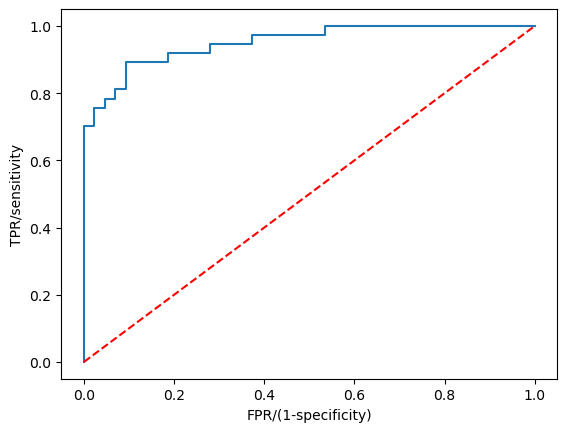

In [67]:
plt.plot(fpr,tpr)
plt.xlabel('FPR/(1-specificity)')
plt.ylabel('TPR/sensitivity')
plt.plot([0,1],[0,1],'r--')
plt.show()

In [68]:
print(roc_auc_score(ytest, ypred_prob_lr[:,1]))

0.9509742300439975


In [70]:
print(confusion_matrix(ytest, ypred_lr))
print(cohen_kappa_score(ytest, ypred_lr))

[[39  4]
 [ 6 31]]
0.7476340694006309


In [88]:
p0 = (39+31)/(39+4+6+31)

In [89]:
pe = ((39*39)/(80*80))+((31*31)/(80*80))

In [90]:
(p0-pe)/(1-pe)

0.7958141909137315

## Imbalanced

In [91]:
youden_table = pd.DataFrame({
    'TPR':tpr,
    'FPR':fpr,
    'Threshold':threshold
})

In [92]:
youden_table['difference'] = youden_table['TPR'] - youden_table['FPR']

In [93]:
youden_table = youden_table.sort_values('difference',ascending=False)

In [94]:
youden_table

,TPR,FPR,Threshold,difference
10,0.891892,0.093023,0.448072,0.798869
8,0.810811,0.069767,0.645490,0.741043
6,0.783784,0.046512,0.662004,0.737272
4,0.756757,0.023256,0.683404,0.733501
12,0.918919,0.186047,0.407121,0.732872
9,0.810811,0.093023,0.635440,0.717788
7,0.783784,0.069767,0.647033,0.714016
5,0.756757,0.046512,0.667982,0.710245
11,0.891892,0.186047,0.411430,0.705845
2,0.702703,0.000000,0.758409,0.702703


In [98]:
import sklearn
print(sklearn.__version__)

1.2.1


In [99]:
print('Training Accuracy:',lr.score(xtrain,ytrain))
print('Test Accuracy:',lr.score(xtest,ytest))

Training Accuracy: 0.85
Test Accuracy: 0.875
